# Premiere Etape : Data Processing


1.   <b> Simulation forward de l'évolution des Poids de chaque action au cours du temps </b> :

        

*   Market Capj_0 = Weightj_0 * Pricej_0
*   Market Capj_i+1 = Market Capj_i * Pricej_i+1 / Pricej_i
*   Weightj_i+1 = Market Capj_i+1 / somme k de 1 a N (Market Capk_i+1)

---

2.   <b> calcul du divisor à la date finale (va etre utilisé pour le ptf reconstruit) </b>:


*   Divisor = somme des prix finals des actions * poids / prix du cac40 final


















In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importe le fichier cac40.xls dans la partie a gauche avant de tourner la cellule
#Table des poids
Initial_Weights = pd.read_excel("cac40.xls", sheet_name = "Poids", header = 0, names = ["company", "delete", "weights"]   )
Initial_Weights = Initial_Weights[["company", "weights"]].copy()

#Table des prix
Prices = pd.read_excel("cac40.xls", sheet_name = "Données quotidiennes", header= 0, index_col = 0)


In [ ]:
Prices.head(5)

,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Societe Generale,STMicroelectronics NV,Suez SA,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,5798.90,40.6441,51.4233,57.50,243.4292,2.75,37.6608,46.2384,41.0608,168.5,...,61.0437,42.59,NaN,39.0814,44.4303,10.8684,45.2226,16.4820,68.0,35.6527
2001-01-03,5684.05,41.0413,51.0560,54.50,247.4619,2.84,37.1290,45.3454,40.2027,158.0,...,60.4393,40.10,NaN,38.7113,44.6932,10.5093,45.2226,16.0770,67.5,36.8572
2001-01-04,5815.99,43.2919,52.4251,62.30,244.7124,3.20,37.0565,46.9330,45.9092,166.0,...,65.0885,45.20,NaN,37.9218,44.4303,10.5772,40.9435,15.4634,70.6,34.8818
2001-01-05,5758.02,44.0674,52.7590,61.65,241.8711,3.10,35.7270,47.4539,46.3383,166.9,...,65.0885,44.25,NaN,37.9958,44.7195,10.4802,41.5756,16.2979,70.7,35.8936
2001-01-08,5732.80,44.5402,53.3934,61.45,229.1314,3.10,35.3161,47.1314,43.7639,166.9,...,66.7622,43.40,NaN,38.4646,44.9298,10.6258,42.6940,15.7947,70.1,36.5922


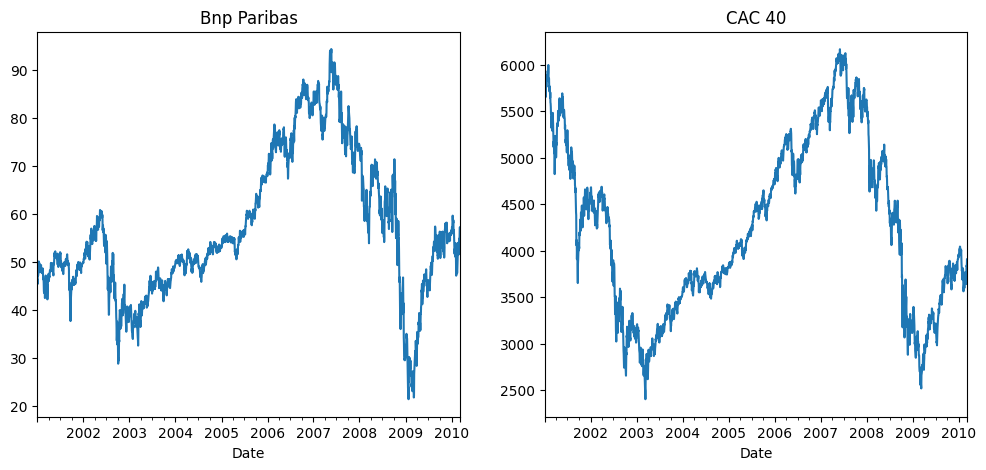

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols =2 , figsize = (12, 5))
Prices["BNP Paribas"].plot(ax = ax[0], label = "BNP Paribas")
ax[0].set_title("Bnp Paribas")
Prices["CAC 40"].plot(ax = ax[1], label = "CAC 40")
ax[1].set_title("CAC 40")
plt.show()

In [ ]:
#Je crée une table avec la meme tete que prices, ou je mettrai l'evolution des poids
Weights = pd.DataFrame(columns=Prices.columns[1:], index=Prices.index)
iw = Initial_Weights.weights
Weights.iloc[0] = iw.values

Market_cap = Weights.iloc[0] * Prices.iloc[0, 1:]
for i in range(1, len(Weights)):
  Market_cap = Market_cap * Prices.iloc[i, 1:] / Prices.iloc[i-1, 1:]
  Weights.iloc[i] = Market_cap / Market_cap.sum()


In [ ]:
Weights.sum(axis=1).head(5) # : tout somme à 1, super

,0
Date,
2001-01-02,1.0
2001-01-03,1.0
2001-01-04,1.0
2001-01-05,1.0
2001-01-08,1.0


In [ ]:
Dividor = (Prices.iloc[-1, 1:] * Weights.iloc[-1]).sum() / Prices.iloc[-1, 0]
print(Dividor)

0.016652947303975953


In [ ]:
CAC40 = Prices["CAC 40"]
Reconst_CAC40 = Prices.iloc[: , 1:] * Weights
Reconst_CAC40 = Reconst_CAC40.sum(axis=1)/Dividor

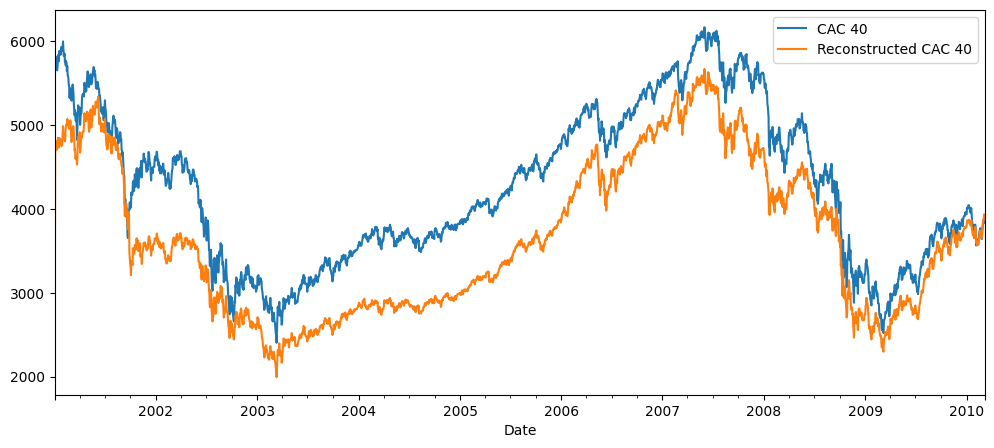

In [ ]:
pd.concat([CAC40, Reconst_CAC40], axis=1).plot(figsize=(12, 5))
plt.legend(["CAC 40", "Reconstructed CAC 40"])
plt.show()

# Deuxieme Etape :  Augmented Dickey Fuller Test

tester whether the time series are <b> integrated of order 1 (I(1)) </b>

In [ ]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(CAC40)[1])
print(adfuller(Reconst_CAC40)[1])

0.26320241543002093
0.4760159524874361


On remarque Que les p-Value des tests sont respectivement 0.26 et 0.47, toute les deux plus grande que 0.05
On differencie les series Selon la régle :
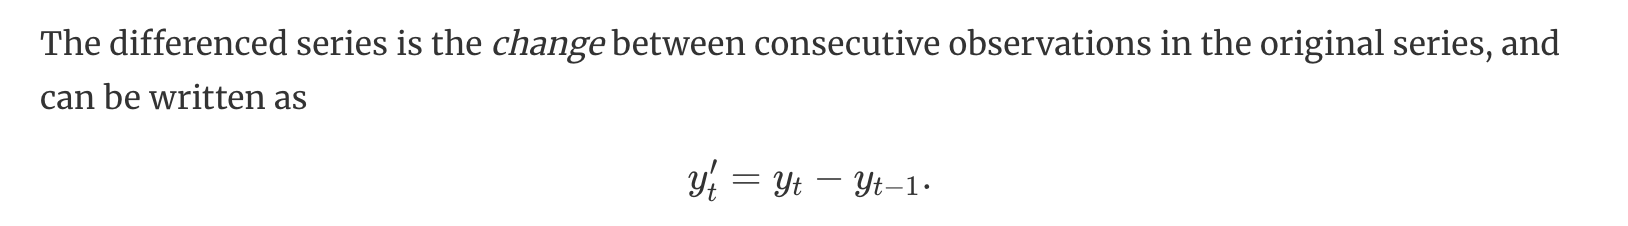

In [ ]:
Diff_CAC40 = CAC40.diff()
Diff_Recon_CAC40 = Reconst_CAC40.diff()
print(f" La p-Value pour Delta_CAC40 est {adfuller(Diff_CAC40[1:])[1]:.2e} ")
print(f" La p-Value pour Delta_CAC40 est {adfuller(Diff_Recon_CAC40[1:])[1]:.2e} ")

 La p-Value pour Delta_CAC40 est 5.15e-20 
 La p-Value pour Delta_CAC40 est 2.96e-19 




*   La P-value est maintnant bcp plus petite que 0.05 de l'ordre de $$10^{-20}$$
<b> Donc nos Series sont effectivement I(1) </b>



In [ ]:
Log_Recon_CAC40 = np.log(Reconst_CAC40.astype("float64"))
Log_Cac_40 = np.log(CAC40.astype("float64"))
Diff_Log_Recon_CAC40 = Log_Recon_CAC40.diff()
Diff_Log_Cac_40 = Log_Cac_40.diff()
print(f" La p-Value pour Log CAC40  est {adfuller(Log_Cac_40[1:])[1]:.2e} ")

print(f" La p-Value pour Log Reconstructed  est {adfuller(Log_Recon_CAC40[1:])[1]:.2e} ")
print(f" La p-Value pour Delta Log CAC40  est {adfuller(Diff_Log_Cac_40[1:])[1]:.2e} ")

print(f" La p-Value pour Delta Log Reconstructed est {adfuller(Diff_Log_Recon_CAC40[1:])[1]:.2e} ")

 La p-Value pour Log CAC40  est 3.54e-01 
 La p-Value pour Log Reconstructed  est 4.89e-01 
 La p-Value pour Delta Log CAC40  est 7.20e-16 
 La p-Value pour Delta Log Reconstructed est 4.54e-20 


In [ ]:

X = np.log(Prices.iloc[:,1:11].values)  # Variables indépendantes (log des prix)
X = np.column_stack((np.ones(len(X)), X))  # Ajouter une colonne de 1 pour l'intercept
y = Log_Recon_CAC40.values  # Variable dépendante

# Régression linéaire
A, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# A contient les coefficients de la régression
print("Coefficients de la régression :", A)

Coefficients de la régression : [5.15017883 0.03697242 0.07763136 0.01604151 0.07914513 0.05172022
 0.23640903 0.10405268 0.12339807 0.02988469 0.1160636 ]


In [ ]:
Residuals = y - np.dot(X, A)
print(f" La p-Value pour Delta_CAC40 est {adfuller(Residuals)[1]:.2e} ")


 La p-Value pour Delta_CAC40 est 1.58e-03 


## Index Tracking

In [ ]:
#Calibration_period et rebalancing_period  a donner en nombre de jours et start_Date en jours  0_based
class Portfolio():
  def __init__(self, data  , Initial_Budget ,  weights, Stock_number, Calibration_period, rebalancing_period, index, log_index, stocks = None,fees= 0.002 ):

    temp = pd.Series(np.nan, index=Weights[Calibration_period :].index, name="Portfolio Value")
    temp.iloc[0] = Initial_Budget

    self.data = data
    self.prices = temp
    self.prices_with_fees = temp.copy()
    self.weights = weights
    self.Stock_number = Stock_number
    self.Calibration_period = Calibration_period
    self.rebalancing_period = rebalancing_period
    self.stocks = stocks
    self.rang_rempli = 0
    self.continuer = 1
    self.index = index
    self.log_index = log_index
    self.transaction = pd.DataFrame(0, index = self.weights.iloc[Calibration_period:,:].index, columns= self.weights.iloc[Calibration_period:,:].columns, dtype = "float64")
    self.coef_TC = fees
    self.fees = pd.Series([])
    self.Tracking_Portfolio_returns = pd.Series([])
    self.Tracking_Portfolio_returns_with_fees = pd.Series([])
    self.data_returns = pd.Series([])



  def price_evolution(self, start_date):
    Prix_stocks = self.data.loc[self.data.index[self.Calibration_period]: , list(self.stocks)]
    prix_initiale = self.prices.iloc[start_date-1]
    prix_inititale_with_fees = self.prices_with_fees.iloc[start_date-1]
    t = start_date
    for t in range(start_date , min(start_date + self.rebalancing_period, len(self.prices)))  :
      temp = self.weights * Prix_stocks.iloc[t,:] /  Prix_stocks.iloc[start_date-1,:]
      self.prices.iloc[t] = prix_initiale * np.sum(temp)
      self.prices_with_fees.iloc[t] = prix_inititale_with_fees * np.sum(temp)
      self.rang_rempli += 1
    return

  def Select_stocks(self, start_date):
    stocks = set()
    temp = self.data.iloc[start_date, : ]
    for _ in range(self.Stock_number):
      stocks.add(temp.idxmax())
      temp = temp.drop(temp.idxmax())
    self.stocks = stocks
    return

  def Calibrate(self, start_date):
    self.Select_stocks(start_date= start_date)
    Prix_stocks = self.data.loc[self.data.index[self.Calibration_period]: , :]
    X = np.log(self.data.loc[self.data.index[start_date]:self.data.index[start_date + self.Calibration_period],list(self.stocks)].values)
    X = np.column_stack((np.ones(len(X)), X))
    y = self.log_index.iloc[start_date:start_date+self.Calibration_period+1].values
    A, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    resid = y - np.dot(X, A)

    if adfuller(resid)[1] < 0.05:
      self.weights = A[1:] / np.sum(A[1:])
      self.transaction.loc[self.transaction.index[self.rang_rempli],list(self.stocks)] = self.weights
      if self.rang_rempli == 0 :
        transaction_cost = self.coef_TC*np.sum(np.abs((self.transaction.iloc[0]-np.zeros(len(self.transaction.iloc[0]))))*self.data.loc[self.transaction.index[0]])
        self.fees = pd.concat([self.fees, pd.Series([transaction_cost])], ignore_index = True)
      else :
        transaction_cost = self.coef_TC*np.sum(np.abs((self.transaction.iloc[self.rang_rempli]-self.transaction.iloc[self.rang_rempli-1]))*Prix_stocks.loc[self.transaction.index[self.rang_rempli]])
        self.fees = pd.concat([self.fees, pd.Series([transaction_cost])], ignore_index = True)
      self.prices.iloc[start_date] = self.prices.iloc[start_date-1]
      self.prices_with_fees.iloc[start_date] = self.prices_with_fees.iloc[start_date-1] - transaction_cost
      self.rang_rempli += 1
    else:
      print("Le portfeuil résultant de cette methode de selection n'est pas cointégré avec l'indice du CAC40 /n")
      print("Fermeture de Positions ...")
      self.continuer = 0
    return

  def Backtest(self):
    while self.continuer and self.rang_rempli < len(self.prices)-1:
      self.Calibrate(self.rang_rempli+1)
      self.price_evolution(self.rang_rempli+1)

  def Results(self):
    self.Backtest()

    self.data_returns = self.log_index.iloc[self.Calibration_period:].astype("float64") - self.log_index.iloc[self.Calibration_period:].shift(1).astype("float64")
    self.Tracking_Portfolio_returns = np.log(self.prices) - np.log(self.prices.shift(1))
    self.Tracking_Portfolio_returns_with_fees = np.log(self.prices_with_fees) - np.log(self.prices_with_fees.shift(1))
    Cumulative_data_returns = self.data_returns.cumsum()
    Cumulative_Tracking_Portfolio_returns = self.Tracking_Portfolio_returns.cumsum()
    Cumulative_Tracking_Portfolio_returns_with_fees = self.Tracking_Portfolio_returns_with_fees.cumsum()
    Cumulative_data_simple_returns = np.exp(Cumulative_data_returns) - 1
    Cumulative_Tracking_Portfolio_simple_returns = np.exp(Cumulative_Tracking_Portfolio_returns) - 1
    Cumulative_Tracking_Portfolio_simple_returns_with_fees = np.exp(Cumulative_Tracking_Portfolio_returns_with_fees) - 1
    fig , ax = plt.subplots(nrows = 1 , ncols =2 , figsize = (12, 5))
    self.Tracking_Portfolio_returns.plot(ax = ax[0], label = "Tracking Portfolio")
    self.Tracking_Portfolio_returns_with_fees.plot(ax = ax[0], label = "Tracking Portfolio With Fees")
    self.data_returns.plot(ax = ax[0], label = "CAC40")
    ax[0].set_title("Returns Comparaison")
    ax[0].legend()

    Cumulative_Tracking_Portfolio_simple_returns.plot(ax = ax[1], label = "Tracking Portfolio")
    Cumulative_data_simple_returns.plot(ax = ax[1], label = "CAC40")
    Cumulative_Tracking_Portfolio_simple_returns_with_fees.plot(ax = ax[1], label = "Tracking Portfolio With Fees")
    ax[1].set_title("Cumulative Returns Comparaison")
    ax[1].legend()
    fig.suptitle(f"Performance du Tracking Avec {self.Stock_number} Actions , Rebalancement tout les {self.rebalancing_period} jours et une periode de calibration de {int(self.Calibration_period / 365)} Ans ", fontsize=10)


    plt.show()

  def Compare(self):
    fig , ax = plt.subplots(nrows = 1 , ncols =2 , figsize = (12, 5))
    self.prices.plot(ax = ax[1], label = "Tracking Portfolio")
    self.prices_with_fees.plot(ax = ax[1], label = "Tracking Portfolio With Fees")
    self.data.iloc[self.Calibration_period:, 0].plot(ax = ax[0], label = "CAC40")
    ax[0].set_title("CAC 40")
    ax[1].set_title("Tracking Portfolio")
    ax[0].legend()
    ax[1].legend()

    plt.show()







Index Tracking using **25 Stocks**, a Calibration Perdion of **3 years and a half**, and a reblancing period of **10 days**, as well as a **0.02 %** of transaction fees.

<ipython-input-21-43f16d100d06>:64: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self.fees = pd.concat([self.fees, pd.Series([transaction_cost])], ignore_index = True)


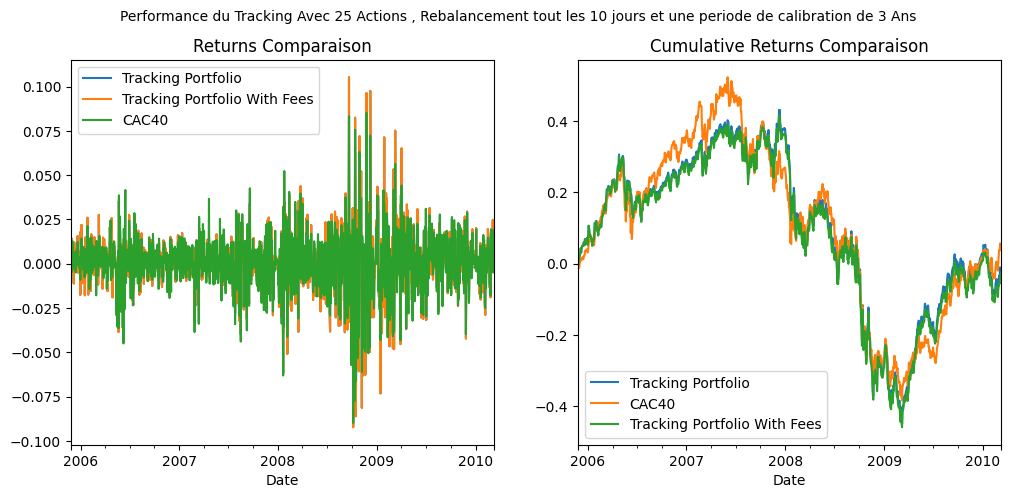

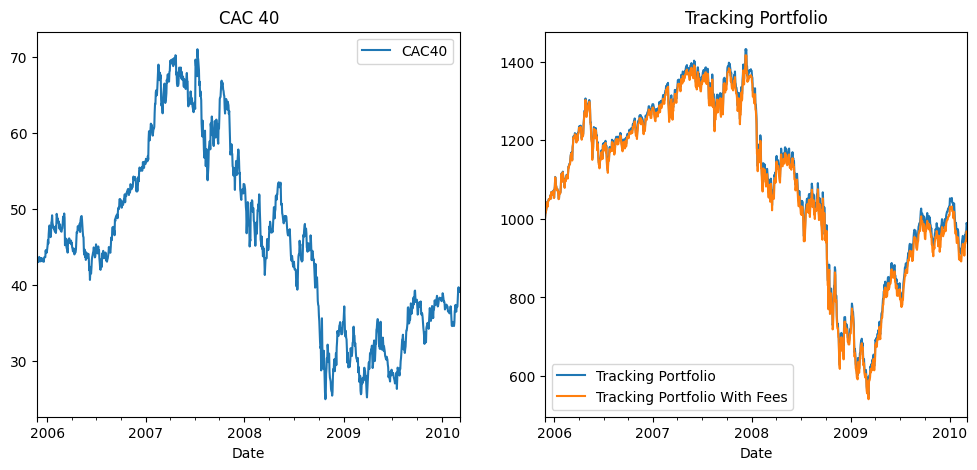

In [ ]:
Initial_Budget = 1000
Stock_number = 25
Calibration_period = 365*3 + 183
rebalancing_period = 10
fees = 0.002
Prices_no_Cac = Prices.drop(columns = ["CAC 40"])
portfeuil1 = Portfolio(data = Prices_no_Cac, Initial_Budget= Initial_Budget ,  weights = Weights, Stock_number= Stock_number, Calibration_period= Calibration_period , rebalancing_period= rebalancing_period, index = Reconst_CAC40, log_index = Log_Recon_CAC40)
portfeuil1.Results()
portfeuil1.Compare()
plt.show()

<ipython-input-21-43f16d100d06>:64: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self.fees = pd.concat([self.fees, pd.Series([transaction_cost])], ignore_index = True)


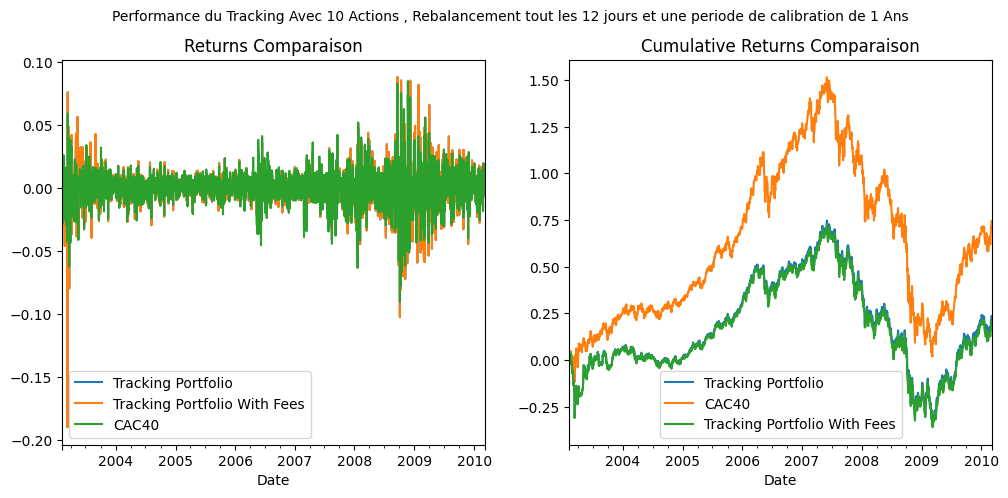

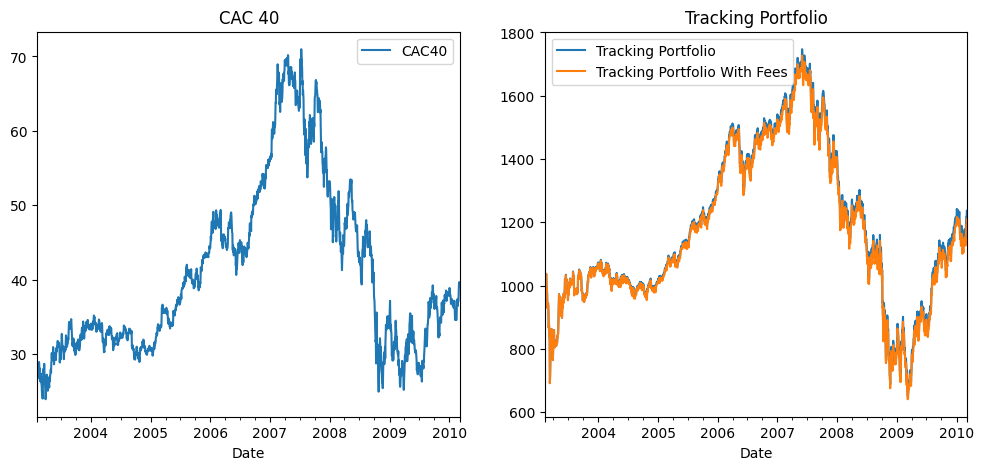

In [ ]:
Initial_Budget = 1000
Stock_number = 10
Calibration_period = 365 + 183
rebalancing_period = 12
Prices_no_Cac = Prices.drop(columns = ["CAC 40"])
portfeuil1 = Portfolio(data = Prices_no_Cac, Initial_Budget= Initial_Budget ,  weights = Weights, Stock_number= Stock_number, Calibration_period= Calibration_period , rebalancing_period= rebalancing_period, index = Reconst_CAC40, log_index = Log_Recon_CAC40)
portfeuil1.Results()
portfeuil1.Compare()
plt.show()

<Axes: >

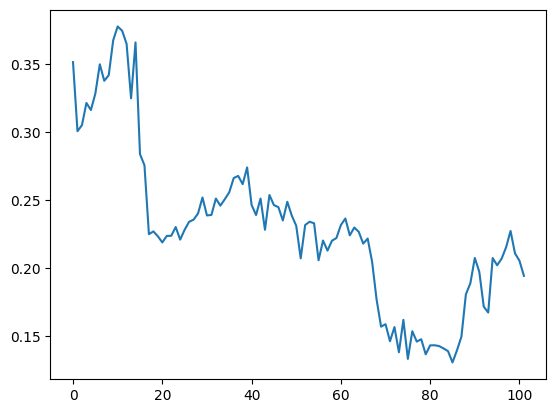

In [ ]:
portfeuil1.fees.plot()

Index Tracking using **25 Stocks**, a Calibration Perdion of **3 years and a half**, and a reblancing period of **10 days**, as well as a **10%** of transaction fees.

<ipython-input-21-43f16d100d06>:64: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self.fees = pd.concat([self.fees, pd.Series([transaction_cost])], ignore_index = True)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


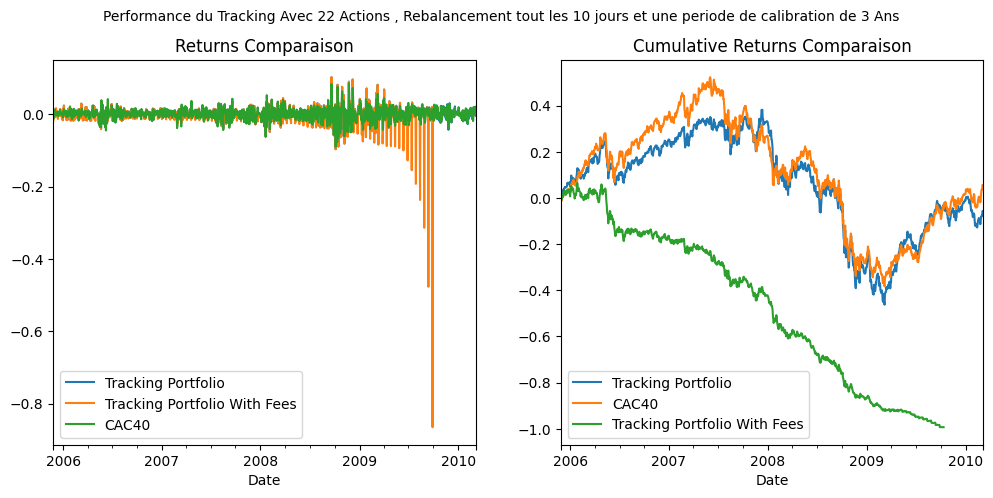

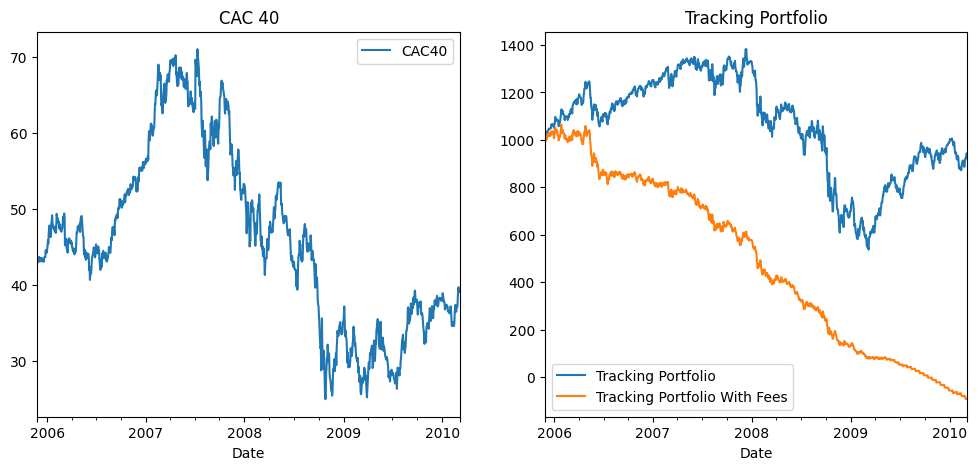

In [ ]:
Initial_Budget = 1000
Stock_number = 22
Calibration_period = 365*3 + 183
rebalancing_period = 10
portfeuil2 = Portfolio(data = Prices_no_Cac, Initial_Budget= Initial_Budget ,  weights = Weights, Stock_number= Stock_number, Calibration_period= Calibration_period , rebalancing_period= rebalancing_period, index = Reconst_CAC40, log_index = Log_Recon_CAC40, fees = 0.1)
portfeuil2.Results()
portfeuil2.Compare()
plt.show()


We calculate the Exponentially Weighted Moving Average Correlation between Tracking portfolio one and the index.

In [ ]:
def ewma_correlation(df1, df2, lambda_=0.94):

    df1, df2 = df1.align(df2, join='inner')

    ewma_var1 = df1.ewm(span=(2 / (1 - lambda_)) - 1).var()
    ewma_var2 = df2.ewm(span=(2 / (1 - lambda_)) - 1).var()
    ewma_cov = df1.ewm(span=(2 / (1 - lambda_)) - 1).cov(df2)

    ewma_corr = ewma_cov / (ewma_var1 ** 0.5 * ewma_var2 ** 0.5)

    return ewma_corr

In [ ]:
ewma_correl_ptf_1 = ewma_correlation(portfeuil1.Tracking_Portfolio_returns, portfeuil1.data_returns)


<Axes: xlabel='Date'>

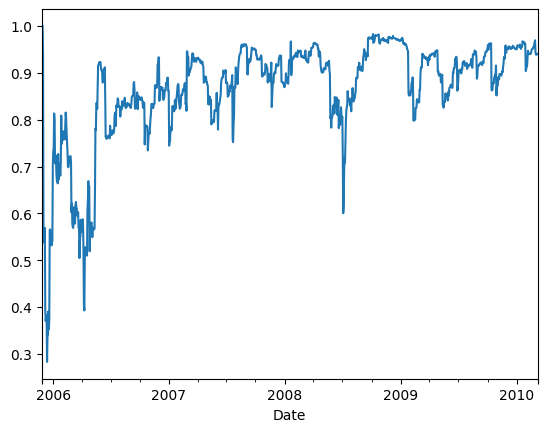

In [ ]:
ewma_correl_ptf_1.plot()